# Import Data and Package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [ ]:

from google.colab import files

# Upload the Excel file
uploaded = files.upload()

# Get the file name from the uploaded keys
filename = list(uploaded.keys())[0]

# Read the Excel file into a DataFrame, specifying the engine
df = pd.read_excel(filename, engine='openpyxl')



Saving Spotify_database.xlsx to Spotify_database.xlsx


# Dataset Overview

In [ ]:
list(df.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'track_id',
 'track_name',
 'popularity',
 'available_markets',
 'disc_number',
 'duration_ms',
 'explicit',
 'track_number',
 'href',
 'album_id',
 'album_name',
 'album_release_date',
 'album_type',
 'album_total_tracks',
 'artists_names',
 'artists_ids',
 'principal_artist_id',
 'principal_artist_name',
 'artist_genres',
 'principal_artist_followers',
 'acousticness',
 'analysis_url',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'year',
 'duration_min']

In [ ]:
df.shape

(11450, 37)

## Missing Value Checking

In [ ]:
df.isnull().sum()

Unnamed: 0.1                    0
Unnamed: 0                      0
track_id                        0
track_name                      0
popularity                      0
available_markets               1
disc_number                     0
duration_ms                     0
explicit                        0
track_number                    0
href                            0
album_id                        0
album_name                      0
album_release_date              0
album_type                      0
album_total_tracks              0
artists_names                   0
artists_ids                     0
principal_artist_id             0
principal_artist_name           0
artist_genres                 117
principal_artist_followers      1
acousticness                    5
analysis_url                    5
danceability                    5
energy                          5
instrumentalness                5
key                             5
liveness                        5
loudness      

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
track_id                      0
track_name                    0
popularity                    0
available_markets             0
disc_number                   0
duration_ms                   0
explicit                      0
track_number                  0
href                          0
album_id                      0
album_name                    0
album_release_date            0
album_type                    0
album_total_tracks            0
artists_names                 0
artists_ids                   0
principal_artist_id           0
principal_artist_name         0
artist_genres                 0
principal_artist_followers    0
acousticness                  0
analysis_url                  0
danceability                  0
energy                        0
instrumentalness              0
key                           0
liveness                      0
loudness                      0
mode                          0
speechin

In [ ]:
df.shape

(11327, 37)

# Data describtion

In [ ]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,Unnamed: 0.1,Unnamed: 0,popularity,disc_number,duration_ms,track_number,album_total_tracks,principal_artist_followers,acousticness,danceability,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
count,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,...,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00
mean,5721.17,718.70,68.01,1.02,229543.41,5.27,14.25,9785487.76,0.23,0.61,...,5.26,0.18,-7.52,0.68,0.09,121.09,3.93,0.54,2004.24,3.83
std,3304.16,444.35,9.32,0.20,64368.32,4.42,9.56,18322570.00,0.26,0.16,...,3.54,0.15,3.76,0.47,0.09,30.08,0.35,0.24,11.03,1.07
min,0.00,0.00,44.00,1.00,33493.00,1.00,1.00,100.00,0.00,0.00,...,0.00,0.00,-47.07,0.00,0.00,0.00,0.00,0.00,1986.00,0.56
25%,2856.50,326.00,61.00,1.00,192033.00,2.00,11.00,940369.00,0.02,0.51,...,2.00,0.09,-9.20,0.00,0.03,96.96,4.00,0.35,1995.00,3.20
50%,5724.00,695.00,68.00,1.00,223466.00,4.00,13.00,3000739.00,0.11,0.62,...,5.00,0.12,-6.71,1.00,0.05,119.23,4.00,0.54,2004.00,3.72
75%,8582.50,1104.00,75.00,1.00,259393.50,8.00,16.00,8690139.00,0.36,0.73,...,8.00,0.24,-5.02,1.00,0.09,140.07,4.00,0.73,2014.00,4.32
max,11449.00,1599.00,100.00,10.00,2238733.00,48.00,176.00,114675033.00,1.00,0.99,...,11.00,0.98,0.52,1.00,0.94,220.10,5.00,0.99,2023.00,37.31


# Export the DataFrame to an Excel file

# Deleting Outliers

In [ ]:
# Extracting the relevant columns for analysis
#analysis_data = df[['track_id', 'duration_min', 'popularity']]
duration_mean = df['duration_min'].mean()
duration_std = df['duration_min'].std()
cutoff = duration_std * 3  # typically 2 or 3 standard deviations
lower, upper = duration_mean - cutoff, duration_mean + cutoff
df = df[(df['duration_min'] >= lower) & (df['duration_min'] <= upper)]


In [ ]:
round(df[['popularity','year', 'duration_min','energy','danceability']].describe(),2)

,popularity,year,duration_min,energy,danceability
count,11324.00,11324.00,11324.00,11324.00,11324.00
mean,68.05,2004.31,3.77,0.65,0.61
std,9.32,11.02,0.92,0.21,0.16
min,45.00,1986.00,0.60,0.00,0.00
25%,61.00,1995.00,3.19,0.52,0.51
50%,68.00,2004.00,3.71,0.67,0.62
75%,75.00,2014.00,4.30,0.82,0.73
max,100.00,2023.00,7.02,1.00,0.99


# Average duration of songs across years


In [ ]:
mean_duration = dict()
mean_popularity = dict()
for i in range(len(df['year'])):
    year, dur, pop = df['year'].values[i], df['duration_min'].values[i], df['popularity'].values[i]
    if mean_duration.get(year) is None:
        mean_duration[year] = [dur]
        mean_popularity[year] = [pop]
    else:
        mean_duration[year].append(dur)
        mean_popularity[year].append(pop)

dur_min_col = [round(np.mean(mean_duration[y]), 2) for y in mean_duration]
pop_col = [round(np.mean(mean_popularity[y]), 2) for y in mean_popularity]

df_new = pd.DataFrame({
    'year': [y for y in mean_duration],
    'duration_mean': dur_min_col,
    'popularity_mean': pop_col
})
df_new.head()

,year,duration_mean,popularity_mean
0,1986,4.12,58.69
1,1987,4.14,59.69
2,1988,4.28,58.36
3,1989,3.89,58.65
4,1990,4.10,59.98


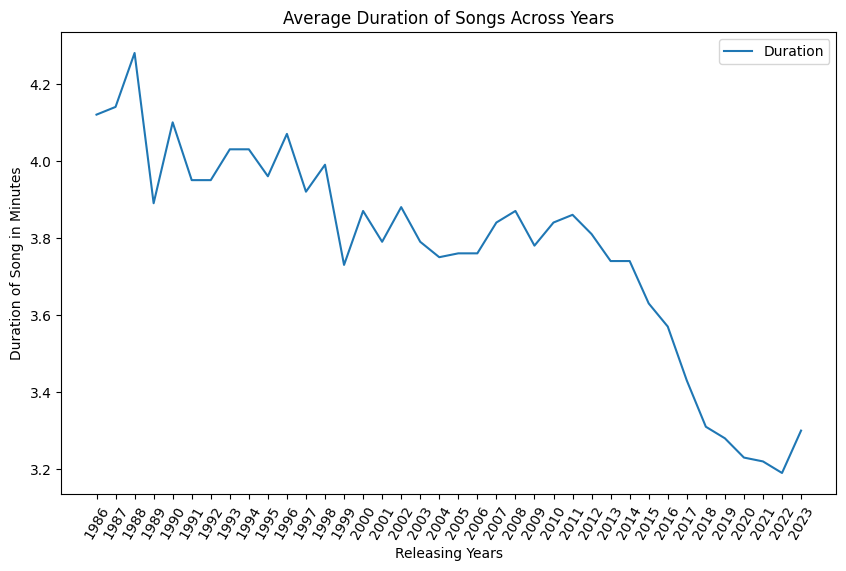

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dur_min_col, label="Duration")
plt.xticks(np.arange(len(dur_min_col)), [y for y in mean_duration], rotation=60)
# plt.ylim(0, 4.5)
plt.title("Average Duration of Songs Across Years")
plt.xlabel("Releasing Years")
plt.ylabel("Duration of Song in Minutes")
plt.legend()
plt.show()

# Scatter Plot of Song Duration vs Popularity with Linear Regression Line

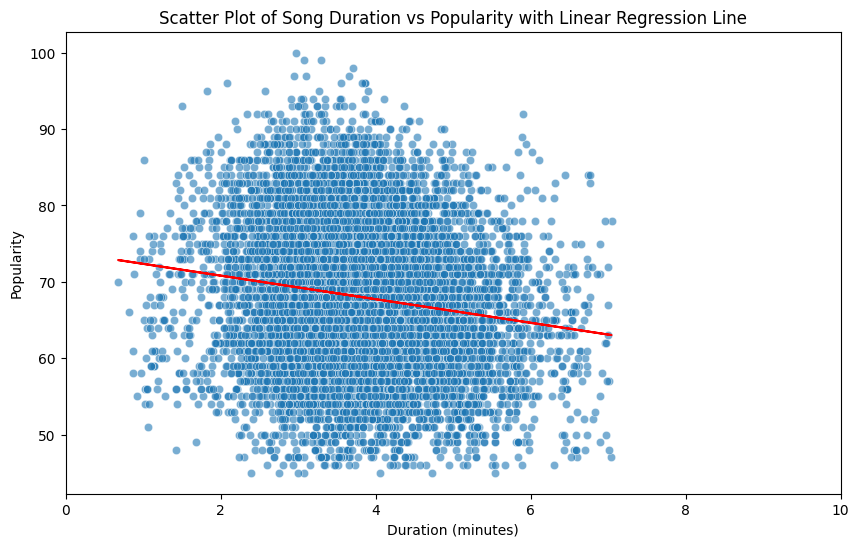

(11208, 1)
(11208, 1)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Define predictor and response variables
X = df['duration_min'].values.reshape(-1, 1)
y = df['popularity'].values.reshape(-1, 1)
# Create linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict popularity for the observed durations
y_pred = model.predict(X)

# Create scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.6)
plt.xlim(0, 10)
plt.plot(X, y_pred, color='red')

# Set plot labels and title
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Song Duration vs Popularity with Linear Regression Line')

# Display plot
plt.show()

print(X.shape)
print(y_pred.shape)

#correlation
#simple regression

# OLS Regression Results

In [ ]:
import pandas as pd
import statsmodels.api as sm


X = sm.add_constant(df['duration_min'])
y = df['popularity']

# Create and fit the simple linear regression model
model = sm.OLS(y, X).fit()

# Get the regression table (summary)
regression_table = model.summary()

print(regression_table)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           4.30e-59
Time:                        17:08:50   Log-Likelihood:                -40773.
No. Observations:               11208   AIC:                         8.155e+04
Df Residuals:                   11206   BIC:                         8.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.8972      0.368    200.808   

# Average Song Duration vs Popularity by Year

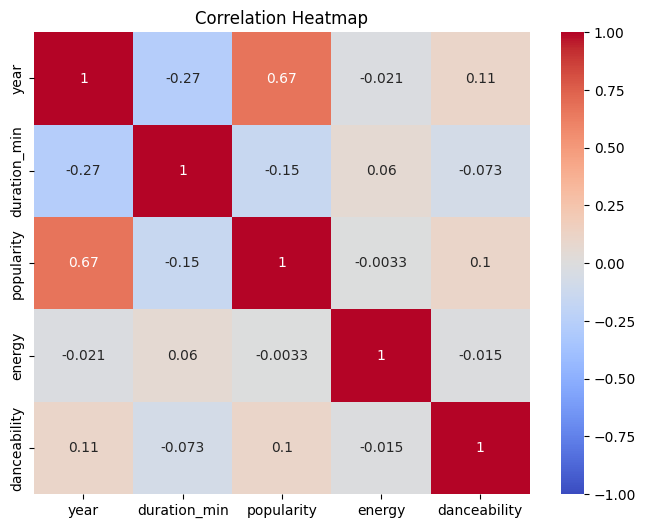

In [ ]:
corr = df[['year', 'duration_min', 'popularity', 'energy', 'danceability']].corr()
# Correct Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
correlation = df['duration_min'].corr(df['popularity'])
print(f"Correlation between Music Duration and popularity is: {correlation:.3f}")

Correlation between Music Duration and popularity is: -0.152


In [ ]:
correlation = df['danceability'].corr(df['energy'])
print(f"Correlation between danceability and energy is: {correlation:.3f}")

Correlation between danceability and energy is: -0.015


In [ ]:
correlation = df['danceability'].corr(df['duration_min'])
print(f"Correlation between danceability and energy is: {correlation:.3f}")

Correlation between danceability and energy is: -0.073


In [ ]:
correlation = df['energy'].corr(df['duration_min'])
print(f"Correlation between danceability and energy is: {correlation:.3f}")

Correlation between danceability and energy is: 0.060


In [ ]:
X = df['year']
Y = df['duration_min']

# Adding a constant and fitting the model
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()


# Get the p-value of the F-statistic and print it in decimal notation
f_pvalue_str = "{:.20f}".format(model.f_pvalue)
print("P-value of the F-statistic:", f_pvalue_str)

# Display the summary
print(model.summary())

P-value of the F-statistic: 0.00000000000000000000
                            OLS Regression Results                            
Dep. Variable:           duration_min   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     857.3
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          1.19e-181
Time:                        17:09:30   Log-Likelihood:                -14529.
No. Observations:               11208   AIC:                         2.906e+04
Df Residuals:                   11206   BIC:                         2.908e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = df[['popularity','duration_min','danceability','energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'year']]


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16403254, 0.13140749, 0.10407922, 0.08389262, 0.07853591,
       0.07439749, 0.06849932, 0.06683864, 0.06135131, 0.05481311,
       0.04804741, 0.02963222, 0.02077877, 0.01369395])

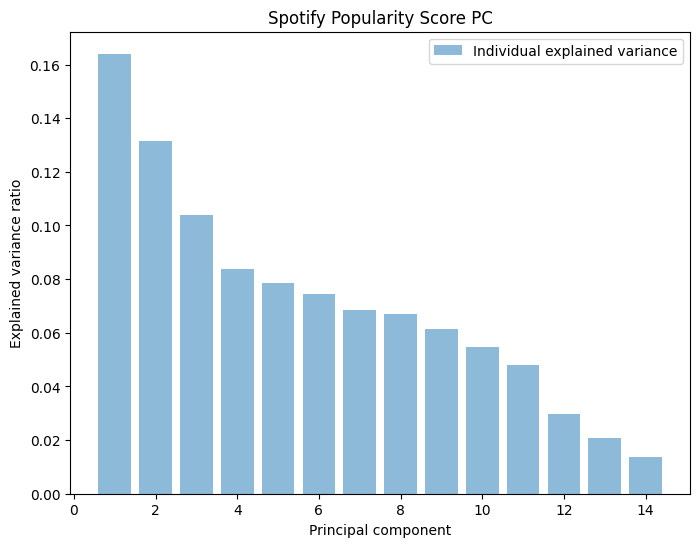

In [ ]:
# Scree Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Spotify Popularity Score PC')
plt.legend()
plt.show()

In [ ]:
import pandas
from sklearn import linear_model

x = df[['duration_min','danceability','energy']]
y = df['popularity']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 70.17660317500247
Coefficients: 
 [-1.47971489  5.35021291  0.31097657]
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     122.0
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           9.99e-78
Time:                        17:09:40   Log-Likelihood:                -40724.
No. Observations:               11208   AIC:                         8.146e+04
Df Residuals:                   11204   BIC:                         8.149e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

Time Series Code


In [ ]:
df

,popularity,duration_min,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year
0,73,3.79,0.40,0.21,0.00,0.00,0.12,-13.15,1.00,0.03,171.28,4.00,0.27,1986
1,61,3.68,0.88,0.55,0.00,6.00,0.23,-13.23,0.00,0.94,91.75,4.00,0.58,1986
2,68,2.62,0.91,0.59,0.00,6.00,0.10,-8.44,0.00,0.33,116.37,4.00,0.66,1986
3,66,4.27,0.58,0.79,0.00,6.00,0.14,-7.26,1.00,0.03,123.89,3.00,0.62,1986
4,63,3.07,0.69,0.59,0.00,2.00,0.36,-10.91,1.00,0.03,121.76,4.00,0.85,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,89,3.58,0.78,0.63,0.00,2.00,0.09,-5.60,0.00,0.05,122.10,4.00,0.50,2023
11446,81,2.59,0.78,0.84,0.00,9.00,0.07,-4.64,0.00,0.04,133.01,3.00,0.90,2023
11447,75,3.52,0.51,0.71,0.00,2.00,0.11,-5.77,1.00,0.03,97.98,4.00,0.26,2023
11448,78,3.57,0.70,0.73,0.00,1.00,0.11,-6.18,1.00,0.26,98.36,4.00,0.29,2023


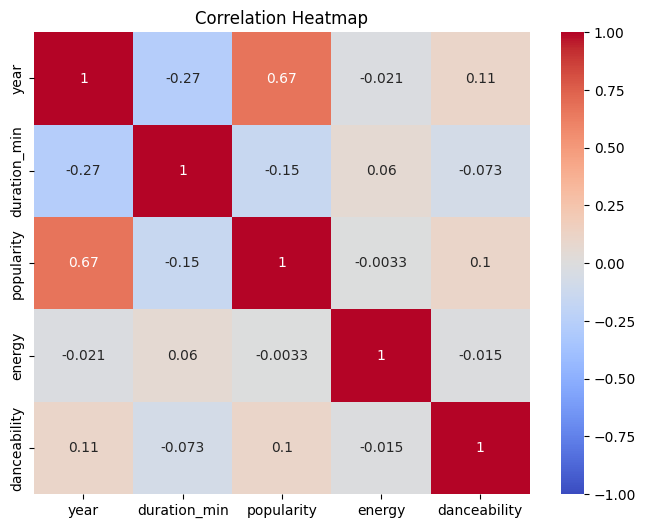

In [ ]:
corr = df[['year', 'duration_min', 'popularity', 'energy', 'danceability']].corr()
# Correct Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df['danceability']
y = df['duration_min']


# Adding a constant and fitting the model
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()


# Get the p-value of the F-statistic and print it in decimal notation
f_pvalue_str = "{:.20f}".format(model.f_pvalue)
print("P-value of the F-statistic:", f_pvalue_str)

# Display the summary
print(model.summary())

P-value of the F-statistic: 0.00000000000001094377
                            OLS Regression Results                            
Dep. Variable:           duration_min   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     59.88
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           1.09e-14
Time:                        17:09:51   Log-Likelihood:                -14912.
No. Observations:               11208   AIC:                         2.983e+04
Df Residuals:                   11206   BIC:                         2.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = df[['popularity','duration_min','danceability','energy',
         'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
         'speechiness', 'tempo', 'time_signature', 'valence']]


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
np.round(explained_variance,3)

array([0.17 , 0.112, 0.096, 0.089, 0.084, 0.08 , 0.073, 0.072, 0.066,
       0.059, 0.051, 0.031, 0.016])

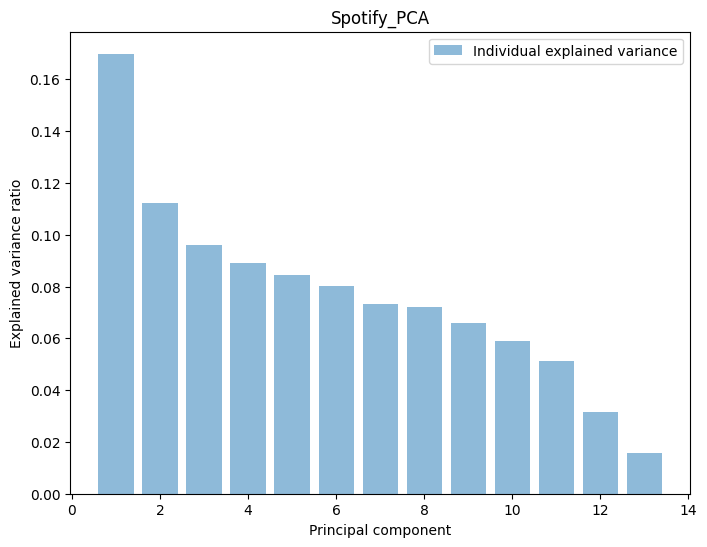

In [ ]:
# Scree Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Spotify_PCA')
plt.legend()
plt.show()

In [ ]:
# Performing PCA
pca = PCA(n_components = 8)
pca.fit(df)

# Extracting the PCA loadings
pca_loadings = pca.components_.T
pca_loadings_df = pd.DataFrame(pca_loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8'], index = ['popularity','duration_min','danceability','energy',
         'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
         'speechiness', 'tempo', 'time_signature', 'valence'])
np.round(pca_loadings_df,4)

In [ ]:
import pandas
from sklearn import linear_model

x = df[['duration_min', 'loudness','tempo','key','mode','time_signature']]
y = df['popularity']

regr = linear_model.LinearRegression()
regr.fit(x, y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', np.round(regr.coef_,3))

# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          1.21e-206
Time:                        17:11:30   Log-Likelihood:                -40418.
No. Observations:               11208   AIC:                         8.085e+04
Df Residuals:                   11201   BIC:                         8.090e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             84.0401      1.137     73.

Time Series Visualization



In [ ]:
df_new = pd.DataFrame({
    'year': [y for y in mean_duration],
    'duration_mean': dur_min_col,
    'popularity_mean': pop_col
})

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


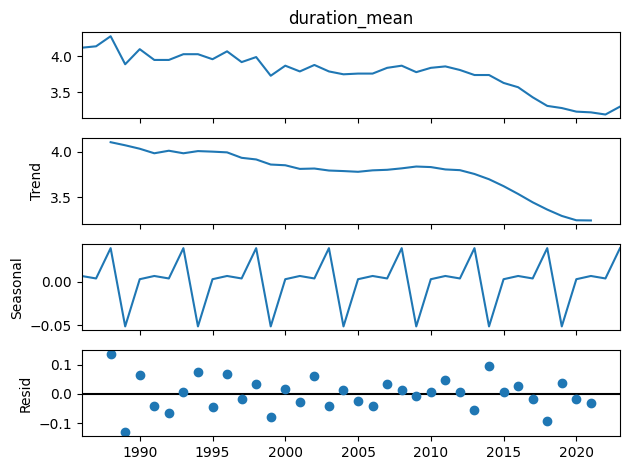

In [ ]:
df_new.set_index('year', inplace=True)

decompose = seasonal_decompose(df_new['duration_mean'], model='additive', period=5)

# Plot the decomposition
decompose.plot()
plt.show()

In [ ]:
import xgboost as xg

In [ ]:
df_new = df_new.drop(columns='popularity_mean')

In [ ]:
df_new.index

Int64Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022, 2023],
           dtype='int64', name='year')

In [ ]:
df_new.index = pd.to_datetime(df.index, format='%Y')

In [ ]:
df_new.index = df_new.index.strftime(pd.to_datetime(df_new.index, format='%Y-%m-%d %H:%M:%S'))

In [ ]:
df_new.index

Int64Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022, 2023],
           dtype='int64', name='year')